# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
# from selenium import webdriver
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
# Instlling  DriveManager
driver_path = ChromeDriverManager().install()
driver_path
#Setting up Splinter
browser = Browser('chrome', executable_path='/Users/dr0dmacmini/.wdm/drivers/chromedriver/mac64/110.0.5481/chromedriver')

[WDM] - Downloading: 100%|██████████| 8.82M/8.82M [00:00<00:00, 14.9MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
#Stops so I don't ping the server to death
time.sleep(2)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup object
html=browser.html
text_soup=soup(html, 'html.parser')
text_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [6]:
# # Extract all rows of data
# rows=text_soup.find_all('th')
# row_data=text_soup.find_all('td')
# print(rows)
# print(row_data)


mars_rows_read = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
df=mars_rows_read[0]
df.columns = ['id', 'terrestrial_dat', 'sol', 'ls', 'month', 'min_temp', 'pressure']
html_table = df.to_html()
html_table

# for one_block in texts:
#     text_dict={}
#     text_dict['list_date']=one_block.find('div', class_='list_date').text
#     text_dict['content_title']=one_block.find('div', class_='content_title').text
#     text_dict['article_teaser_body']=one_block.find('div', class_='article_teaser_body').text
#     print(text_dict)


              

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id</th>\n      <th>terrestrial_dat</th>\n      <th>sol</th>\n      <th>ls</th>\n      <th>month</th>\n      <th>min_temp</th>\n      <th>pressure</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2</td>\n      <td>2012-08-16</td>\n      <td>10</td>\n      <td>155</td>\n      <td>6</td>\n      <td>-75.0</td>\n      <td>739.0</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>13</td>\n      <td>2012-08-17</td>\n      <td>11</td>\n      <td>156</td>\n      <td>6</td>\n      <td>-76.0</td>\n      <td>740.0</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>24</td>\n      <td>2012-08-18</td>\n      <td>12</td>\n      <td>156</td>\n      <td>6</td>\n      <td>-76.0</td>\n      <td>741.0</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>35</td>\n      <td>2012-08-19</td>\n      <td>13</td>\n      <td>157</td>\n      <td>6</td>\n      <td>-7

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Confirm DataFrame was created successfully
mars_rows_read = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
df=mars_rows_read[0]
df.columns = ['id', 'terrestrial_dat', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df.set_index('id', inplace=True)
df.to_html()
data = df.to_dict(orient='records')
df



,terrestrial_dat,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
results = df.dtypes
print(results)


terrestrial_dat     object
sol                  int64
ls                   int64
month                int64
min_temp           float64
pressure           float64
dtype: object


In [9]:
# Change data types for data analysis
import datetime
# convert_data= {'terrestrial_dat': date}

df['terrestrial_dat'] = pd.to_datetime(df['terrestrial_dat'])
print(df)
print (df.dtypes)
              

     terrestrial_dat   sol   ls  month  min_temp  pressure
id                                                        
2         2012-08-16    10  155      6     -75.0     739.0
13        2012-08-17    11  156      6     -76.0     740.0
24        2012-08-18    12  156      6     -76.0     741.0
35        2012-08-19    13  157      6     -74.0     732.0
46        2012-08-20    14  157      6     -74.0     740.0
...              ...   ...  ...    ...       ...       ...
1889      2018-02-23  1973  133      5     -78.0     730.0
1892      2018-02-24  1974  134      5     -77.0     729.0
1894      2018-02-25  1975  134      5     -76.0     729.0
1893      2018-02-26  1976  135      5     -77.0     728.0
1895      2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 6 columns]
terrestrial_dat    datetime64[ns]
sol                         int64
ls                          int64
month                       int64
min_temp                  float64
pressure                  float64
dtyp

In [10]:
# Confirm type changes were successful by examining data types again
print (df.dtypes)

terrestrial_dat    datetime64[ns]
sol                         int64
ls                          int64
month                       int64
min_temp                  float64
pressure                  float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
import numpy as np
mars_months = np.unique(df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
# 2. How many Martian days' worth of data are there?
#Dataset starts off on the 10th day. 
df['sol'].max()-9

1968

In [20]:
# 3. What is the average low temperature by month?
# pressure = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')

headers = list(df)
avg_min_temp = df[headers[3:5]].groupby('month', as_index=False).mean().sort_values('min_temp')
avg_min_temp

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


In [17]:
def barplot(x, y, title):
    style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'{title.split()[-2]} {title.split()[-1]}')
    ax.set_xticks(x)

    # Show Figure
    plt.show()

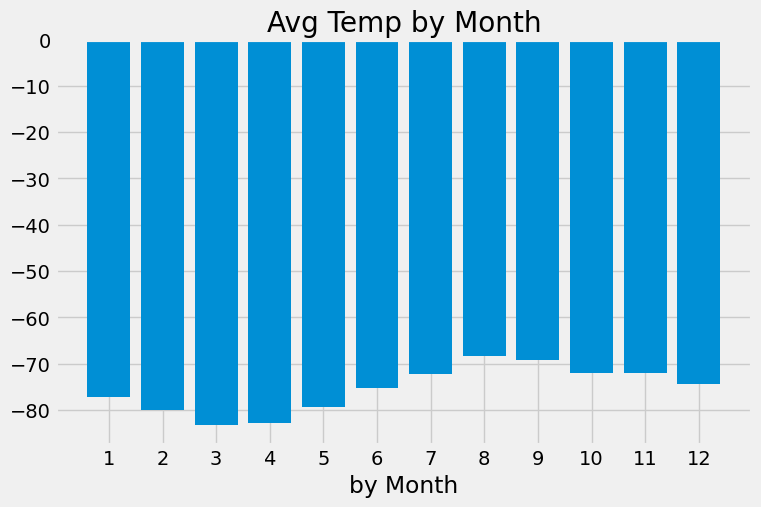

In [19]:
# Plot the average temperature by month
barplot(avg_min_temp['month'], avg_min_temp['min_temp'], 'Avg Temp by Month')

In [203]:
# I split this quesiton in two

# Identify the coldest months in Curiosity's location
min_temp= df[headers[3:5]].groupby('month').min().sort_values('min_temp')
min_temp


,min_temp
month,
3,-90.0
4,-89.0
2,-86.0
5,-85.0
6,-84.0
1,-82.0
10,-81.0
12,-81.0
7,-78.0


In [205]:
# Identify the hottest months in Curiosity's location
max_temp = df[headers[3:5]].groupby('month').max().sort_values('min_temp')
max_temp

,min_temp
month,
3,-77.0
4,-77.0
2,-76.0
5,-74.0
6,-71.0
12,-70.0
11,-67.0
10,-66.0
7,-65.0


In [263]:
# 4. Average pressure by Martian month
pressure = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure

,month,ls,min_temp,pressure
5,6,164.897959,-75.299320,745.054422
4,5,132.885906,-79.308725,748.557047
6,7,194.894366,-72.281690,795.105634
3,4,104.365979,-82.747423,806.329897
11,12,344.692771,-74.451807,842.156627
10,11,314.536232,-71.985507,857.014493
0,1,15.281609,-77.160920,862.488506
7,8,224.347518,-68.382979,873.829787
2,3,75.010417,-83.307292,877.322917
9,10,286.330357,-71.982143,887.312500


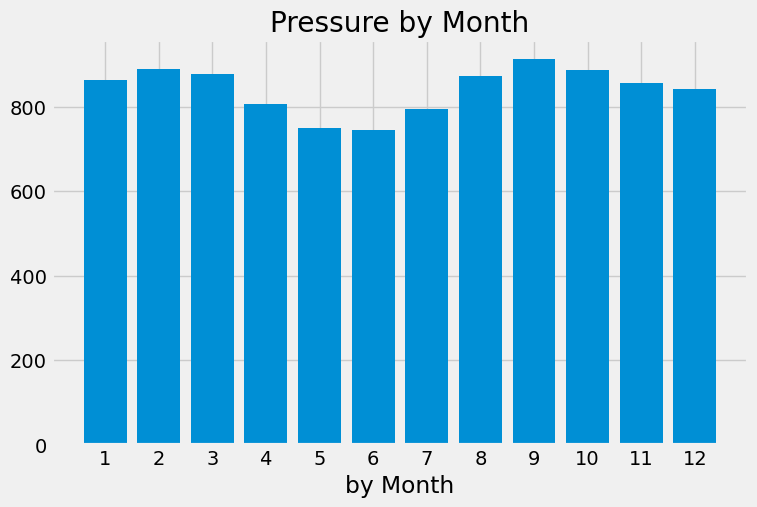

In [264]:
# Plot the average pressure by month
barplot(pressure['month'], pressure['pressure'], 'Pressure by Month')

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# mars_days=df['sol'].max()- df['sol'].min()
# mars_days
earth_days = mars_days / 365
earth_days

5.389041095890411

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
df.to_csv("mars_data.csv")

In [33]:
browser.quit()